In [5]:
import os
import gzip
import numpy as np
from matplotlib import pyplot as plt
import scipy.special 
np.random.seed(542)

In [6]:
files = {
    "train_images": "train-images-idx3-ubyte.gz",
    "train_labels": "train-labels-idx1-ubyte.gz",
    "test_images": "t10k-images-idx3-ubyte.gz",
    "test_labels": "t10k-labels-idx1-ubyte.gz"
}
for file_name in files.values():
    local_path = os.path.join('mnist_data', file_name)
    with gzip.open(local_path) as f:
        content = f.read()
        if 'images' in local_path:
            if 'train-images' in local_path:
                train_img = np.frombuffer(content, dtype=np.uint8, offset=16)
            else:
                test_img = np.frombuffer(content, dtype=np.uint8, offset=16)
        else:
            if 'train-labels' in local_path:
                train_label = np.frombuffer(content, dtype=np.uint8, offset=8)
            else:
                test_label = np.frombuffer(content, dtype=np.uint8, offset=8)
test_img.shape = (10000, 28, 28)
train_img.shape = (60000, 28, 28)

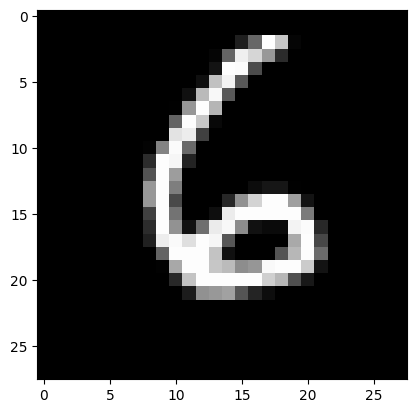

number: 7


In [7]:

plt.imshow(test_img[600], cmap='gray')
plt.show()
print('number:', test_label[551])

NEURAL NETWORK CLASS

In [8]:
class neuralNetwork:
    def __init__(self, innode, hnode, onode, lr):
        self.innode = innode
        self.hnode = hnode
        self.onode = onode
        self.lr = lr
        self.wih = np.random.normal(0.0, pow(hnode, -0.5), (hnode, innode))
        self.who = np.random.normal(0.0, pow(onode, -0.5), (onode, hnode))
        self.activation = lambda x: scipy.special.expit(x)
    def train(self, i, target):
        i = i.T
        target = target.T
        oh, oo = self.query(i.T)
        error = target-oo
        herror = np.dot(self.who.T, error)
        self.who += self.lr*np.dot(error*oo*(1-oo), oh.T)
        self.wih += self.lr*np.dot(herror*oh*(1-oh), i.T)
        return self.wih, self.who
    def query(self, i):
        i = i.T
        zh = np.dot(self.wih, i)
        oh = self.activation(zh)
        zo = np.dot(self.who, oh)
        oo = self.activation(zo)
        return oh, oo
    def display(self, img):
        plt.imshow(img, cmap='gray')
        plt.plot()


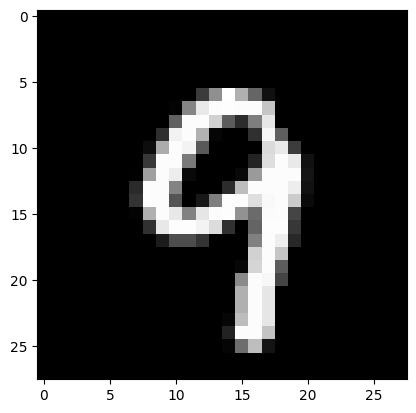

In [9]:
tester = train_img[550].reshape(1, 784)
tester.shape = (28, 28)
plt.imshow(tester, cmap='gray')
plt.show()

TRAIN

In [10]:
epoch = 2
lrate = 0.1
target = np.identity(10)
n = neuralNetwork(784, 100, 10, lrate)
for j in range(epoch):
    for k in range(len(train_img)):
        i = train_img[k].reshape(1, 784)/255*0.9 +0.1
        targeti = target[train_label[k]].reshape(1, 10)
        wih, who = n.train(i, targeti)

QUERYING

Network output: 6
True output: 5


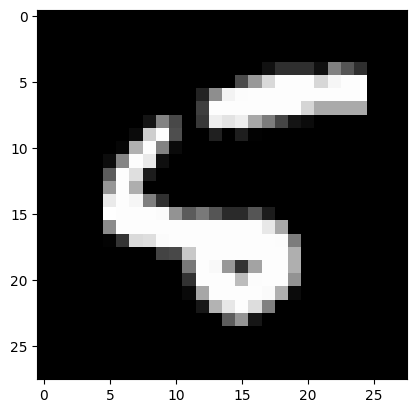

In [11]:
j = 8
i = test_img[j].reshape(1, 784)
oh, oo = n.query(i)
n.display(test_img[j])
out = np.argmax(oo)
real = test_label[j]
print('Network output:', out)
print('True output:', real)

ACCURACY TESTING

In [12]:
out = len(test_label)+1
inp = len(test_label)+1
incorrect = list()
for j in range(len(test_label)):
    i = test_img[j].reshape(1, 784)/255
    oh, oo = n.query(i)
    real = test_label[j]
    net = np.argmax(oo)
    if real != net:
        incorrect.append(j)
        out = out-1
print('Accuracy =',(out/inp)*100)

Accuracy = 94.79052094790521


In [13]:
len(incorrect)

521